In [1]:
import numpy as np
import scipy
from numpy.linalg import norm, eig, cond
from scipy.linalg import svd
import matplotlib.pyplot as plt
import time

## Задача 1.  Матричные вычисления, оценка скорости и погрешностей (5 баллов).

1. Напишите функцию, которая вычисляет экспоненту от матрицы размера $2 \times 2$, используя определение экспоненты через предел

$$
\lim _{n \rightarrow \infty}(I+A / n)^n
$$

Элементами матрицы могут быть любые комплексные числа. Возведение матрицы в степень напишите, используя формулу   

$$
\alpha_n=(r+u)^n \quad \beta_n=(u-r)^n ; A^n=\frac{\alpha_n+\beta_n}{2} I+\frac{\alpha_n-\beta_n}{2 r}\left(v e_1+w e_2+t e_{12}\right) \\
r=\sqrt{w^2+v^2-t^2} ; \quad u=\frac{a+d}{2}, \quad v=\frac{a-d}{2}, \quad w=\frac{b+c}{2}, \quad t=\frac{b-c}{2}
$$

Здесь

$$
\begin{aligned}
& \left(\begin{array}{ll}
a & b \\
c & d
\end{array}\right)=u \cdot \mathbf{I}+v \cdot \mathbf{e}_1+w \cdot \mathbf{e}_2+t \cdot \mathbf{e}_{12} \\
& \mathbf{e}_1=\left(\begin{array}{cc}
1 & 0 \\
0 & -1
\end{array}\right), \quad \mathbf{e}_2=\left(\begin{array}{ll}
0 & 1 \\
1 & 0
\end{array}\right), \quad \mathbf{e}_{12}=\left(\begin{array}{cc}
0 & 1 \\
-1 & 0
\end{array}\right)
\end{aligned}
$$


Возьмите любую матрицу на ваш выбор и продемонстрируйте, как падает ошибка по спектральной норме при росте n, построив график зависимости ошибки от n. Дальнейшую часть задания делайте при каком-то достаточно большом n, при котором относительная ошибка очень мала.

2. Напишите функцию, которая генерирует большое количество случайных матриц размера $2 \times 2$, состоящих из вещественных чисел из диапазона от -1 до 1 и для каждой вычисляет экспоненту. Постройте график зависимости времени работы программы в зависимости от количества итераций из матриц при числе итераций $n=10 . .50$.
3. Напишите функцию, которая генерирует большое количество (не менее 1000) различных матриц размера $2 \times 2$, собственные числа которых являются натуральными логарифмами натуральных чисел, а матрицы собственных векторов состоят из целых чисел и имеют определитель, равный единице. Они нужны для вычисления ошибки написанного вами алгоритма, так как экспоненты из таких матриц можно рассчитать точно. Часть из таких матриц сгенерировать специально с одинаковыми собственными числами, причем как для диагональной жордановой формы, так и для недиагональной.
4. Вычислите точные значения экспонент этих матриц. Выведите 10 таких экспонент, матрицы, от которых берутся экспоненты, их собственные векторы и числа.
5. Постройте график относительной ошибки этих вычислений (по спектральной норме) в зависимости от числа обусловленности сгенерированной матрицы.


### 1.1

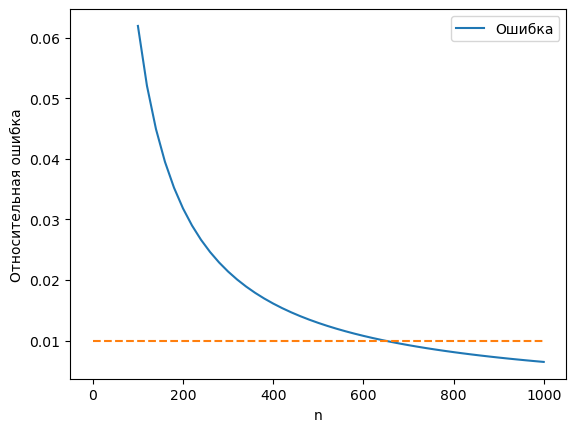

In [2]:
def matrix_power_formula(A, n):
    a, b = A[0, 0], A[0, 1]
    c, d = A[1, 0], A[1, 1]
    
    u = (a + d) / 2
    v = (a - d) / 2
    w = (b + c) / 2
    t = (b - c) / 2
    
    r = np.sqrt(np.abs(w**2 + v**2 - t**2))

    alpha_n = (r + u)**n
    beta_n = (u - r)**n
 
    I = np.eye(2)
    e1 = np.array([[1, 0], [0, -1]])
    e2 = np.array([[0, 1], [1, 0]])
    e12 = np.array([[0, 1], [-1, 0]])
    
    An = (alpha_n + beta_n) / 2 * I + (alpha_n - beta_n) / (2 * r) * (v * e1 + w * e2 + t * e12)
    
    return An

def matrix_exponential_limit(A, n):
    I = np.eye(2)
    return matrix_power_formula(I + A / n, n)

A = np.array([[2, 1], [1, 3]])
exact_expA = scipy.linalg.expm(A)
n_values = np.arange(100, 1001, 20)
errors = []

for n in n_values:
    approx_expA = matrix_exponential_limit(A, n)
    error = norm(approx_expA - exact_expA, ord=2) / norm(exact_expA, ord=2)
    errors.append(error)

plt.plot(n_values, errors, label='Ошибка')
plt.plot([0, 1000], [0.01, 0.01], linestyle='dashed')
plt.xlabel("n")
plt.ylabel("Относительная ошибка")
plt.legend()
plt.show()


### 1.2

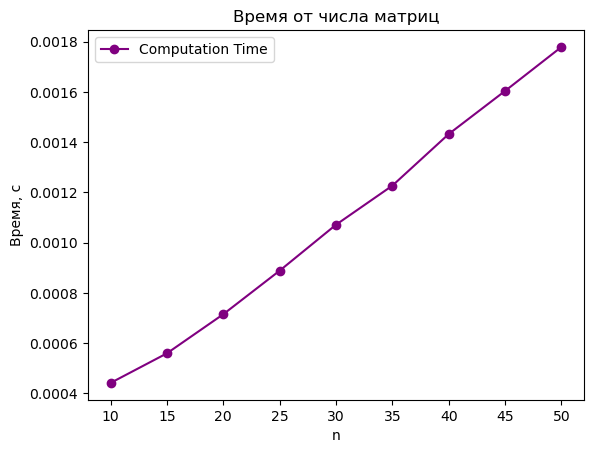

In [6]:
def generate_random_matrices(num_matrices):
    return [np.random.uniform(-1, 1, (2, 2)) for _ in range(num_matrices)]

num_matrices = 100
n_iterations = range(10, 51, 5)
times = []

for n in n_iterations:
    matrices = generate_random_matrices(n)
    runs = 100 #for averaging
    start_time = time.time()
    for r in range(runs):
        for matrix in matrices:
            _ = matrix_exponential_limit(matrix, 1000)
    end_time = time.time()
    times.append((end_time - start_time)/runs)

plt.plot(n_iterations, times, marker='o', color="purple", label="Computation Time")
plt.xlabel("n")
plt.ylabel("Время, с")
plt.title("Время от числа матриц")
plt.legend()
plt.show()


### 1.3

In [14]:
import numpy as np
from scipy.linalg import expm, eig, norm
import matplotlib.pyplot as plt

def generate_matrices_with_log_eigenvalues(num_matrices=1000):
    matrices = []
    Ps = []
    eigenvalues = [np.log(k) for k in range(2, num_matrices + 2)]
    
    for i in range(num_matrices):
        if i % 2 == 0:
            D = np.diag([eigenvalues[i % len(eigenvalues)], eigenvalues[(i + 1) % len(eigenvalues)]])
        else:
            D = np.array([[eigenvalues[i % len(eigenvalues)], 1], [0, eigenvalues[i % len(eigenvalues)]]])
        
        P = np.array([[1, 0], [np.random.randint(1, 5), 1]])
        # Преобразуем в матрицу A = P * D * P^(-1)
        A = P @ D @ np.linalg.inv(P)
        matrices.append(A)
        Ps.append(P)
    
    return matrices, Ps


### 1.4

In [28]:
matrices, Ps = generate_matrices_with_log_eigenvalues(10)
exp_data = []
for i in range(10):
    A = matrices[i]
    P = Ps[i]
    eigenvalues = eig(A)[0]
    exp_A = expm(A)
    exp_data.append([A, exp_A])
    
    print(f"Матрица A:\n{A}")
    print(f"Собственные значения: {eigenvalues}")
    print(f"Собственные вектора:\n{P}")
    print(f"Экспонента матрицы A:\n{exp_A}\n")



Матрица A:
[[ 0.69314718  0.        ]
 [-0.81093022  1.09861229]]
Собственные значения: [1.09861229+0.j 0.69314718+0.j]
Собственные вектора:
[[1 0]
 [2 1]]
Экспонента матрицы A:
[[ 2.  0.]
 [-2.  3.]]

Матрица A:
[[ 0.09861229  1.        ]
 [-1.          2.09861229]]
Собственные значения: [1.09861229+0.j 1.09861229+0.j]
Собственные вектора:
[[1 0]
 [1 1]]
Экспонента матрицы A:
[[-3.33066907e-16  3.00000000e+00]
 [-3.00000000e+00  6.00000000e+00]]

Матрица A:
[[ 1.38629436  0.        ]
 [-0.22314355  1.60943791]]
Собственные значения: [1.60943791+0.j 1.38629436+0.j]
Собственные вектора:
[[1 0]
 [1 1]]
Экспонента матрицы A:
[[ 4.  0.]
 [-1.  5.]]

Матрица A:
[[ 0.60943791  1.        ]
 [-1.          2.60943791]]
Собственные значения: [1.6094379 +0.j 1.60943793+0.j]
Собственные вектора:
[[1 0]
 [1 1]]
Экспонента матрицы A:
[[-5.55111512e-16  5.00000000e+00]
 [-5.00000000e+00  1.00000000e+01]]

Матрица A:
[[ 1.79175947  0.        ]
 [-0.61660272  1.94591015]]
Собственные значения: [1.94591

### 1.5

[[ 1.99951983  0.        ]
 [-1.99734324  2.99819145]] [[ 0.69314718  0.        ]
 [-0.81093022  1.09861229]]
[[ 3.29023220e-03  2.99490121e+00]
 [-2.99490121e+00  5.99309266e+00]] [[ 0.09861229  1.        ]
 [-1.          2.09861229]]
[[ 3.99616177  0.        ]
 [-0.99737363  4.9935354 ]] [[ 1.38629436  0.        ]
 [-0.22314355  1.60943791]]
[[ 8.02387107e-03  4.98551153e+00]
 [-4.98551153e+00  9.97904692e+00]] [[ 0.60943791  1.        ]
 [-1.          2.60943791]]
[[ 5.99038799  0.        ]
 [-3.9855548   6.98677669]] [[ 1.79175947  0.        ]
 [-0.61660272  1.94591015]]
[[ -20.90605313    6.97320745]
 [-111.57131927   34.87960651]] [[ -2.05408985   1.        ]
 [-16.           5.94591015]]
[[ 7.98274626  0.        ]
 [-3.98234619  8.97833281]] [[ 2.07944154  0.        ]
 [-0.47113214  2.19722458]]
[[ -26.85626053    8.95864834]
 [-143.33837337   44.81292615]] [[ -1.80277542   1.        ]
 [-16.           6.19722458]]
[[ 9.97356613  0.        ]
 [-3.97962057 10.96847128]] [[ 2.3025

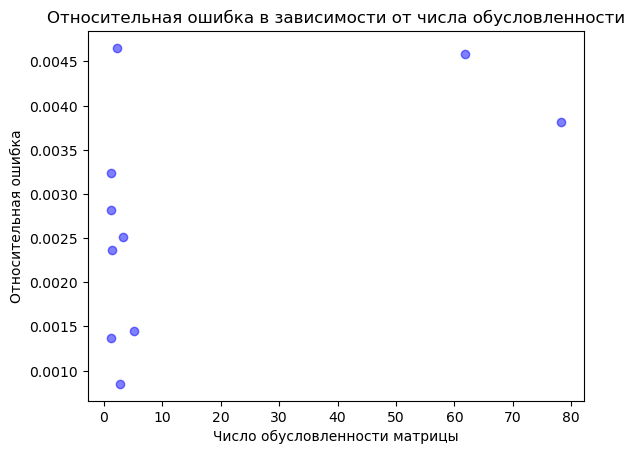

In [29]:
def compute_relative_errors(matrices_data):
    condition_numbers = []
    relative_errors = []
    
    for A, exp_A, in matrices_data:
        cond_number = np.linalg.cond(A)
        approx_exp_A = matrix_exponential_limit(A, 1000)
        print(approx_exp_A, A)
        relative_error = norm(exp_A - approx_exp_A, ord=2) / norm(exp_A, ord=2)
        
        condition_numbers.append(cond_number)
        relative_errors.append(relative_error)
    
    return condition_numbers, relative_errors

condition_numbers, relative_errors = compute_relative_errors(exp_data)

plt.scatter(condition_numbers, relative_errors, alpha=0.5, color='blue')
plt.xlabel("Число обусловленности матрицы")
plt.ylabel("Относительная ошибка")
plt.title("Относительная ошибка в зависимости от числа обусловленности")
plt.show()


## Задача 2. Регуляризация и регрессия, метод наименьших квадратов и SVD (4 балла).


Пусть функция $f(x,y)$ задана таблицей своих значений в узлах на квадрате $0 <= x <= 1; 0 <= y <= 1$ с шагом $0.01$ (проще говоря, таблицей чисел 101 на 101).

$$
f(x,y) = sin(x) \cdot cos(y) \cdot \ln(x+y+1)
$$

1. Вычислите таблицу, сделайте её SVD преобразование как матрицы, постройте график убывания сингулярных чисел в зависимости от номера сингулярного числа.

2. Оставьте только 10 самых больших сингулярных значений, и постройте приближение матрицы с помощью матрицы ранга 10. После этого визуализируйте две матрицы - исходную и малоранговую.

3. Вычислите ошибку аппроксимации по спектральной норме.  

4. Приблизьте таблицу функции $g(x,y) = sin(x) \cdot cos(y) $ матрицей второго ранга и вычислите ошибку аппроксимации. Визуализируйте обе матрицы.

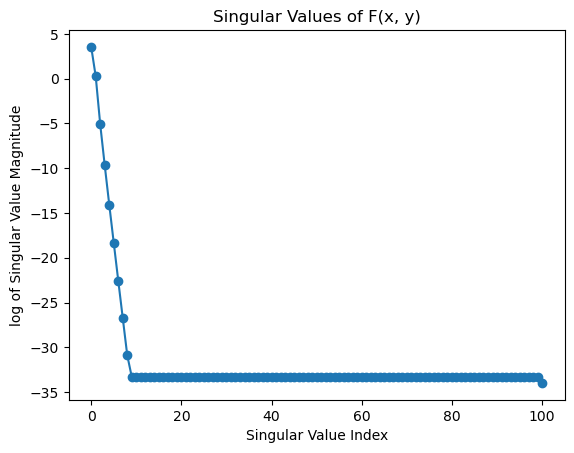

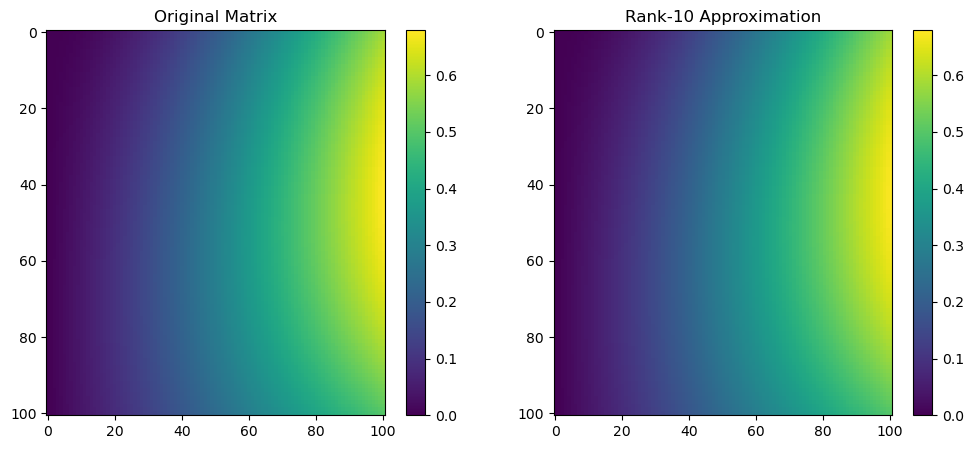

ошибка аппроксимации по спектральной норме, ранк-10: 1.2198602756096776e-14
ошибка аппроксимации по спектральной норме, ранк-2 для g(x, y): 3.4622570495687975e-14


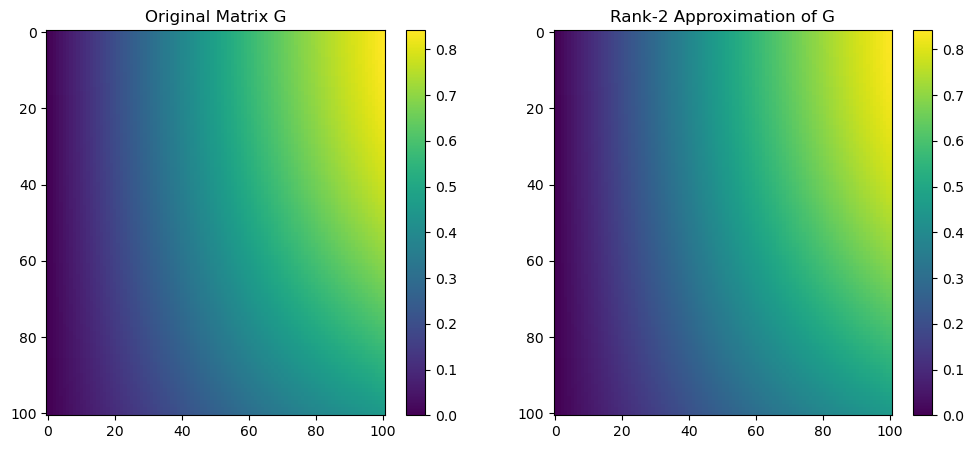

In [30]:
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)
X, Y = np.meshgrid(x, y)
F = np.sin(X) * np.cos(Y) * np.log(X + Y + 1)

# 1
U, S, Vt = svd(F, full_matrices=False)
plt.plot(np.log(S), marker='o')
plt.xlabel("Singular Value Index")
plt.ylabel("log of Singular Value Magnitude")
plt.title("Singular Values of F(x, y)")
plt.show()

# 2
S_approx = np.zeros_like(S)
S_approx[:10] = S[:10] 
F_approx = U @ np.diag(S_approx) @ Vt

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
c1 = axs[0].imshow(F, aspect='auto')
axs[0].set_title("Original Matrix")
plt.colorbar(c1, ax=axs[0])
c2 = axs[1].imshow(F_approx, aspect='auto')
axs[1].set_title("Rank-10 Approximation")
plt.colorbar(c2, ax=axs[1])
plt.show()

# 3
error_spectral = np.linalg.norm(F - F_approx, ord=2)
print("ошибка аппроксимации по спектральной норме, ранк-10:", error_spectral)

# 4
G = np.sin(X) * np.cos(Y)
U_g, S_g, Vt_g = svd(G, full_matrices=False)
S_g_approx = np.zeros_like(S_g)
S_g_approx[:2] = S_g[:2] 
G_approx = U_g @ np.diag(S_g_approx) @ Vt_g

error_g_spectral = np.linalg.norm(G - G_approx, ord=2)
print("ошибка аппроксимации по спектральной норме, ранк-2 для g(x, y):", error_g_spectral)

# Plot original and approximated G matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
c1 = axs[0].imshow(G, aspect='auto')
axs[0].set_title("Original Matrix G")
plt.colorbar(c1, ax=axs[0])
c2 = axs[1].imshow(G_approx, aspect='auto')
axs[1].set_title("Rank-2 Approximation of G")
plt.colorbar(c2, ax=axs[1])
plt.show()


## Задача 3. Решение нелинейных уравнений и поиск минимума функций. (3 балла).

Для нелинейной системы уравнений

$$
\begin{aligned}
& x^2+y^2=4 \\
& y=x^{10}
\end{aligned}
$$

Прежде чем выбирать начальное приближение, можете приближенно локализовать корни этой системы вручную.

1.  Решить методом Ньютона.
2.  Предложить для решения сходящийся метод простой итерации и решить с помощью него.
3. Сравнить эффективность методов, реализованных в первых двух пунктах - построить графики зависимости точности от количества итераций.

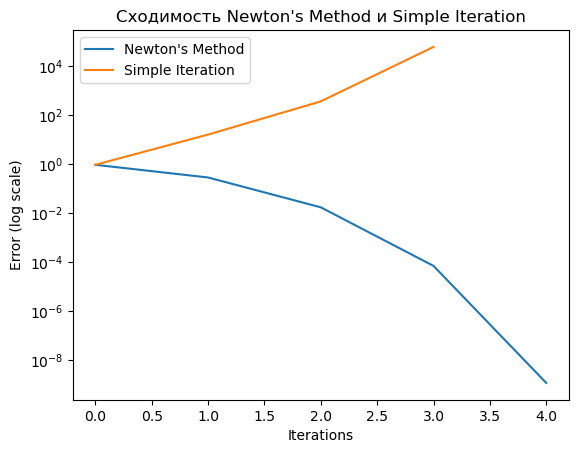

((1.0544614205290597, 1.6994443540804265),
 (1.7320508075688772, 242.99999999999986))

In [31]:
from scipy.linalg import solve

def equations(vars):
    x, y = vars
    return np.array([x**2 + y**2 - 4, y - x**10])

def jacobian(vars):
    x, y = vars
    return np.array([[2*x, 2*y], [-10*x**9, 1]])

def newton_method(initial_guess, tol=1e-6, max_iter=100):
    x, y = initial_guess
    history_newton = []
    for i in range(max_iter):
        F = equations([x, y])
        J = jacobian([x, y])
        delta = solve(J, -F)
        x, y = x + delta[0], y + delta[1]
        history_newton.append(np.linalg.norm(F))
        if np.linalg.norm(delta) < tol:
            break
    return (x, y), history_newton


def simple_iteration_method(initial_guess, tol=1e-6, max_iter=100):
    x, y = initial_guess
    history_simple = []
    for i in range(max_iter):
        x_new = np.sqrt(4 - y**2) if y**2 <= 4 else x 
        y_new = x**10
        history_simple.append(np.linalg.norm(equations([x, y])))
        if np.abs(x_new - x) < tol and np.abs(y_new - y) < tol:
            break
        x, y = x_new, y_new
    return (x, y), history_simple

initial_guess = (1, 1.5)

solution_newton, history_newton = newton_method(initial_guess)
solution_simple, history_simple = simple_iteration_method(initial_guess)

plt.plot(history_newton, label='Newton\'s Method')
plt.plot(history_simple, label='Simple Iteration')
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Error (log scale)')
plt.legend()
plt.title('Сходимость Newton\'s Method и Simple Iteration')
plt.show()

solution_newton, solution_simple
